In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('../../Data/Fish/Top12_Fish_FOSS_Landings.csv')

In [42]:
df

,Year,State,NMFS Name,Pounds,Metric Tons,Dollars,Confidentiality,Collection,Scientific Name,Tsn,Source
0,2021,OREGON,"COD, PACIFIC",15.0,0.0,NaN,Public,Recreational,NaN,164711,MRIP
1,2021,OREGON,"POLLOCK, WALLEYE",220.0,0.0,NaN,Public,Commercial,Gadus chalcogrammus,934083,PACFIN
2,2021,CONNECTICUT,"CRAB, BLUE",803.0,0.0,1024.0,Public,Commercial,Callinectes sapidus,98696,ACCSP
3,2021,OREGON,"COD, PACIFIC",2205.0,1.0,781.0,Public,Commercial,Gadus macrocephalus,164711,PACFIN
4,2021,OREGON,"SALMON, SOCKEYE",2866.0,1.0,8557.0,Public,Commercial,Oncorhynchus nerka,161979,PACFIN
...,...,...,...,...,...,...,...,...,...,...,...
6811,1950,NORTH CAROLINA,MENHADENS **,124904900.0,56656.0,1221468.0,Public,Commercial,Brevoortia,161731,ACCSPHIST
6812,1950,NEW JERSEY,MENHADENS **,138578600.0,62859.0,1497647.0,Public,Commercial,Brevoortia,161731,ACCSPHIST
6813,1950,DELAWARE,MENHADENS **,151857500.0,68882.0,1548947.0,Public,Commercial,Brevoortia,161731,ACCSPHIST
6814,1950,VIRGINIA,MENHADENS **,169814800.0,77027.0,1482721.0,Public,Commercial,Brevoortia,161731,ACCSPHIST


In [69]:
df_total_species_year = df.groupby(['NMFS Name', 'Year'])['Dollars', 'Pounds'].sum().reset_index()


C:\Users\valor\AppData\Local\Temp/ipykernel_23352/1778480543.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_total_species_year = df.groupby(['NMFS Name', 'Year'])['Dollars', 'Pounds'].sum().reset_index()


In [70]:
df_total_species_year

,NMFS Name,Year,Dollars,Pounds
0,"COD, PACIFIC",1950,295343.0,7945918.0
1,"COD, PACIFIC",1951,516118.0,9567600.0
2,"COD, PACIFIC",1952,572051.0,10843800.0
3,"COD, PACIFIC",1953,370952.0,8641000.0
4,"COD, PACIFIC",1954,651350.0,16652000.0
...,...,...,...,...
808,"SHRIMP, NORTHERN WHITE",2017,261672773.0,126791451.0
809,"SHRIMP, NORTHERN WHITE",2018,187207998.0,91166298.0
810,"SHRIMP, NORTHERN WHITE",2019,261093380.0,125271990.0
811,"SHRIMP, NORTHERN WHITE",2020,231212568.0,114495213.0


In [76]:
correlation = df['Pounds'].corr(df['Dollars'])
print('Correlation between Pounds and Dollars:', correlation)

Correlation between Pounds and Dollars: 0.5142403228981718


In [71]:
df_cod = df_total_species_year[df_total_species_year['NMFS Name'] == 'COD, PACIFIC']

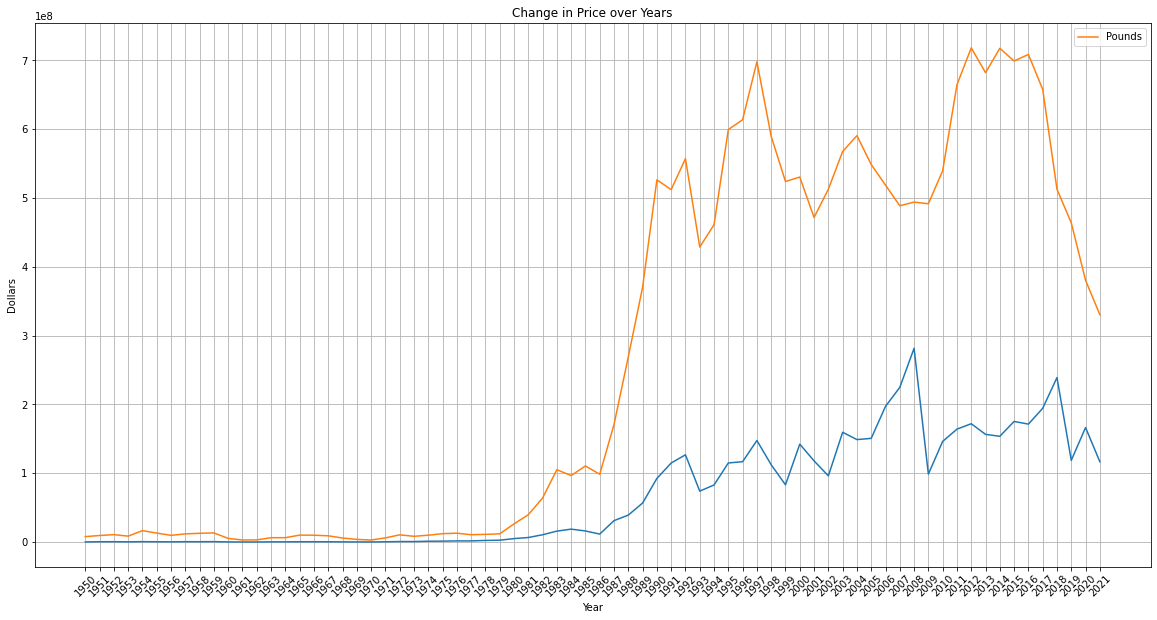

In [83]:
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(20,10))
# Plot the data
ax.plot(df_cod['Year'], df_cod['Dollars'])
ax.plot(df_cod['Year'], df_cod['Pounds'], label='Pounds')

# Set the x-axis tick frequency to display each individual year
ax.set_xticks(df_cod['Year'])

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.grid(True)
# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Dollars')
ax.set_title('Change in Price over Years')
ax.legend()

# Show the plot
plt.show()